In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import dask.dataframe as dd


from datetime import datetime
pd.options.mode.string_storage = 'python'


In [3]:
data_path = "/Users/lucy/Desktop/UCLA/pems_data/pems_data_station_hour/merged_hour.csv"
df = dd.read_csv(data_path)
df.head()

,05/01/2024 00:00:00,715900,7,5,S,OR,Unnamed: 6,0,0.1,Unnamed: 9,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,05/01/2024 00:00:00,715901,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,05/01/2024 00:00:00,715903,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05/01/2024 00:00:00,715904,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,05/01/2024 00:00:00,715905,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,05/01/2024 00:00:00,715906,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# want to turn header into its own row
df.columns

Index(['05/01/2024 00:00:00', '715900', '7', '5', 'S', 'OR', 'Unnamed: 6', '0',
       '0.1', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28',
       'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32',
       'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36',
       'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40',
       'Unnamed: 41'],
      dtype='object')

In [4]:
n_rows = df.shape[0].compute()  # compute the number of rows
n_rows

42923819

In [ ]:
# 0 Timestamp	The date and time of the beginning of the summary interval. For example, a time of 08:00:00 indicates that the aggregate(s) contain measurements collected between 08:00:00 and 08:59:59. Note that minute and second values are always 0 for hourly aggregations. The format is MM/DD/YYYY HH24:MI:SS.	 
# 1 Station	Unique station identifier. Use this value to cross-reference with Metadata files.	 
# 2 District	District #	 
# 3 Route	Route #	 
# 4 Direction of Travel	N | S | E | W	 
# 5 Lane Type	A string indicating the type of lane. Possible values (and their meaning are:
# CD (Coll/Dist)
# CH (Conventional Highway)
# FF (Fwy-Fwy connector)
# FR (Off Ramp)
# HV (HOV)
# ML (Mainline)
# OR (On Ramp)
 
# 6 Station Length	Segment length covered by the station in miles/km.	 
# 7 Samples	Total number of samples received for all lanes.	 
# 8 % Observed	Percentage of 5-minute lane points that were observed (e.g. not imputed).	%
# 9 Total Flow	Sum of 5-minute flows over the hour. Note that the basic 5-minute rollup normalizes flow by the number of good samples received from the controller.	Veh/Hour
# 10 Avg Occupancy	Average of 5-minute station occupancies over the hour expressed as a decimal number between 0 and 1.	%
# 11 Avg Speed	Flow-weighted average of 5-minute station speeds. If flow is 0, mathematical average of 5-minute station speeds.	Mph
# 12 Delay (V_t=35)	The average delay over the station length, with respect to a threshold speed of 35 mph.	 
# 13 Delay (V_t=40)	The average delay over the station length, with respect to a threshold speed of 40 mph.	 
# 14 Delay (V_t=45)	The average delay over the station length, with respect to a threshold speed of 45 mph.	 
# 15 Delay (V_t=50)	The average delay over the station length, with respect to a threshold speed of 50 mph.	 
# 16 Delay (V_t=55)	The average delay over the station length, with respect to a threshold speed of 55 mph.	 
# 17 Delay (V_t=60)	The average delay over the station length, with respect to a threshold speed of 60 mph.	 
# Lane N Flow	Sum of 5-minute flows for lane N over the hour. Note that the basic 5-minute rollup normalizes flow by the number of good samples received from the controller. N ranges from 1 to the number of lanes at the location.	Veh/Hour
# Lane N Avg Occ	Average of 5-minute occupancies for lane N over the hour expressed as a decimal number between 0 and 1. N ranges from 1 to the number of lanes at the location.	%
# Lane N Avg Speed	Flow-weighted average of 5-minute lane N speeds. If flow is 0, mathematical average of 5-minute lane speeds. N ranges from 1 to the number of lanes at the location.

In [9]:
len(df.columns)

42

In [4]:
# SET COLUMN NAMES
first_columns = ['timestamp', 'station_id', 'district', 'route_num', 'travel_dir', 'lane_type', 'station_len', 'sample_num',
                 'percent_observed', 'total_flow', 'avg_occupancy', 'avg_speed', 'delay_35', 'delay_40', 'delay_45', 'delay_50',
                 'delay_55', 'delay_60']

# generate the rest of the column names
lane_columns = [] # start from column number = 12
lane_num = 1
col_type_index = 0
col_types = ['lane_flow', 'lane_avg_occ', 'lane_avg_speed']
for i in range(len(first_columns), len(df.columns)):
  new_col_name =  col_types[col_type_index] + '_' + str(lane_num)
  col_type_index += 1
  lane_columns.append(new_col_name)
  # means you have reached the end of col_types list
  if col_type_index == 3:
    col_type_index = 0
    lane_num += 1

final_columns = first_columns + lane_columns
final_columns

['timestamp',
 'station_id',
 'district',
 'route_num',
 'travel_dir',
 'lane_type',
 'station_len',
 'sample_num',
 'percent_observed',
 'total_flow',
 'avg_occupancy',
 'avg_speed',
 'delay_35',
 'delay_40',
 'delay_45',
 'delay_50',
 'delay_55',
 'delay_60',
 'lane_flow_1',
 'lane_avg_occ_1',
 'lane_avg_speed_1',
 'lane_flow_2',
 'lane_avg_occ_2',
 'lane_avg_speed_2',
 'lane_flow_3',
 'lane_avg_occ_3',
 'lane_avg_speed_3',
 'lane_flow_4',
 'lane_avg_occ_4',
 'lane_avg_speed_4',
 'lane_flow_5',
 'lane_avg_occ_5',
 'lane_avg_speed_5',
 'lane_flow_6',
 'lane_avg_occ_6',
 'lane_avg_speed_6',
 'lane_flow_7',
 'lane_avg_occ_7',
 'lane_avg_speed_7',
 'lane_flow_8',
 'lane_avg_occ_8',
 'lane_avg_speed_8']

In [5]:
df.columns = final_columns

In [6]:
# add header info as a row to the dataframe
new_row = {key: np.float64('nan') for key in df.columns}
new_row['timestamp'] = '05/01/2024 00:00:00'
new_row['station_id'] = '715900'
new_row['district'] = '7'
new_row['route_num'] = '5'
new_row['travel_dir'] = 'S'
new_row['lane_type'] = 'OR'
new_row['sample_num'] = 0
new_row['percent_observed'] = '0.1'
print(new_row)

# New row as a pandas DataFrame
new_row_df = pd.DataFrame([new_row])

# Convert to Dask DataFrame
new_row_dd = dd.from_pandas(new_row_df, npartitions=1)

# Append to existing Dask DataFrame
df = dd.concat([df, new_row_dd])

{'timestamp': '05/01/2024 00:00:00', 'station_id': '715900', 'district': '7', 'route_num': '5', 'travel_dir': 'S', 'lane_type': 'OR', 'station_len': np.float64(nan), 'sample_num': 0, 'percent_observed': '0.1', 'total_flow': np.float64(nan), 'avg_occupancy': np.float64(nan), 'avg_speed': np.float64(nan), 'delay_35': np.float64(nan), 'delay_40': np.float64(nan), 'delay_45': np.float64(nan), 'delay_50': np.float64(nan), 'delay_55': np.float64(nan), 'delay_60': np.float64(nan), 'lane_flow_1': np.float64(nan), 'lane_avg_occ_1': np.float64(nan), 'lane_avg_speed_1': np.float64(nan), 'lane_flow_2': np.float64(nan), 'lane_avg_occ_2': np.float64(nan), 'lane_avg_speed_2': np.float64(nan), 'lane_flow_3': np.float64(nan), 'lane_avg_occ_3': np.float64(nan), 'lane_avg_speed_3': np.float64(nan), 'lane_flow_4': np.float64(nan), 'lane_avg_occ_4': np.float64(nan), 'lane_avg_speed_4': np.float64(nan), 'lane_flow_5': np.float64(nan), 'lane_avg_occ_5': np.float64(nan), 'lane_avg_speed_5': np.float64(nan), '

In [7]:
df['timestamp_conv'] = dd.to_datetime(df['timestamp'], format="%m/%d/%Y %H:%M:%S")

In [9]:
df.head()

,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_flow_6,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8,timestamp_conv
0,05/01/2024 00:00:00,715901,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01
1,05/01/2024 00:00:00,715903,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01
2,05/01/2024 00:00:00,715904,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01
3,05/01/2024 00:00:00,715905,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01
4,05/01/2024 00:00:00,715906,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01


In [8]:
# combine route and travel dir into one string
df = df.assign(highway=str(df['route_num']) + '_' + df['travel_dir'])  
# df['highway'] = str(df['route_num'].compute()) + '_' + df['travel_dir'].compute()

In [9]:
df['highway']

Dask Series Structure:
npartitions=86
    string
       ...
     ...  
       ...
       ...
Dask Name: getitem, 11 expressions
Expr=(Assign(frame=Assign(frame=Concat(frames=[ColumnsSetter(frame=ReadCSV(711cfaf), columns=['timestamp', 'station_id', 'district', 'route_num', 'travel_dir', 'lane_type', 'station_len', 'sample_num', 'percent_observed', 'total_flow', 'avg_occupancy', 'avg_speed', 'delay_35', 'delay_40', 'delay_45', 'delay_50', 'delay_55', 'delay_60', 'lane_flow_1', 'lane_avg_occ_1', 'lane_avg_speed_1', 'lane_flow_2', 'lane_avg_occ_2', 'lane_avg_speed_2', 'lane_flow_3', 'lane_avg_occ_3', 'lane_avg_speed_3', 'lane_flow_4', 'lane_avg_occ_4', 'lane_avg_speed_4', 'lane_flow_5', 'lane_avg_occ_5', 'lane_avg_speed_5', 'lane_flow_6', 'lane_avg_occ_6', 'lane_avg_speed_6', 'lane_flow_7', 'lane_avg_occ_7', 'lane_avg_speed_7', 'lane_flow_8', 'lane_avg_occ_8', 'lane_avg_speed_8']), df], ))))['highway']

In [81]:
df.info()

<class 'dask_expr.DataFrame'>
Columns: 44 entries, timestamp to highway
dtypes: datetime64[ns](1), object(4), float64(34), int64(1), string(4)

In [13]:
# 1. Group by station_id and compute % missing in 'total_flow' for each group
missing_ratios = (
    df.groupby('station_id')['total_flow']
    .apply(lambda x: x.isna().mean(), meta=('total_flow', 'float64'))
    .compute()
)

# 2. Find station_ids with more than 80% missing
bad_stations = missing_ratios[missing_ratios > 0.8].index.tolist()
print(bad_stations)

# 3. Filter out those station_ids from the original Dask DataFrame
df_filtered = df[~df['station_id'].isin(bad_stations)]

[715923, 716058, 716150, 716370, 716379, 716724, 716854, 717636, 759892, 764989, 765825, 766662, 768300, 770216, 770246, 772363, 774260, 776316, 716139, 716207, 716475, 718156, 760608, 761621, 763789, 765090, 765297, 767165, 770230, 772210, 716403, 716507, 716514, 716619, 716732, 717107, 717969, 718282, 718391, 763818, 768310, 768726, 768971, 769300, 770026, 772514, 773391, 715907, 716071, 716114, 716157, 716454, 717868, 717985, 763775, 765126, 768446, 768592, 768683, 769705, 773132, 774281, 776308, 716009, 716204, 716217, 716302, 716438, 716728, 716868, 716964, 717336, 717690, 718015, 760040, 762441, 766947, 767395, 716400, 716479, 717111, 717267, 717521, 717691, 718055, 759637, 760321, 760624, 765834, 766989, 768350, 768608, 775083, 716233, 716371, 716418, 716666, 716795, 717939, 718325, 760335, 763781, 765117, 767408, 771148, 771656, 773462, 774035, 775796, 716234, 716305, 716564, 717287, 717293, 717953, 760875, 764744, 764998, 766240, 766291, 771957, 775270, 715913, 715989, 716132,

In [14]:
len(bad_stations)

1380

In [ ]:
# 4889 total station ids
df['station_id'].value_counts().compute()

station_id
715947    8783
716046    8783
716084    8783
716093    8783
716201    8783
          ... 
774140    8783
774246    8783
774878    8783
775100    8783
776241    8783
Name: count, Length: 4889, dtype: int64

In [16]:
df_filtered.head()

,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8,timestamp_conv,highway
11,05/01/2024 00:00:00,715915,7,5,N,ML,0.620,0,0,1806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01,Dask Series Structure:\nnpartitions=86\n ob...
12,05/01/2024 00:00:00,715916,7,5,S,ML,0.710,0,0,1806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01,Dask Series Structure:\nnpartitions=86\n ob...
13,05/01/2024 00:00:00,715918,7,5,N,ML,0.615,0,0,1476.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01,Dask Series Structure:\nnpartitions=86\n ob...
14,05/01/2024 00:00:00,715920,7,5,S,ML,1.150,0,0,2181.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01,Dask Series Structure:\nnpartitions=86\n ob...
17,05/01/2024 00:00:00,715925,7,5,S,OR,NaN,107,100,40.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01,Dask Series Structure:\nnpartitions=86\n ob...


In [82]:
# filtered = df[df['percent_observed'] != 0]
# filtered.head()

In [ ]:
# filtered.shape[0].compute() # 11425051 rows

11425051

In [17]:
## EDA on test station, station ID = 715926 -> only has data from jan - may
# 40 seconds
df_eda_test = df[df['station_id'] == 715915]
df_eda_test.head()

,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8,timestamp_conv,highway
11,05/01/2024 00:00:00,715915,7,5,N,ML,0.62,0,0,1806.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 00:00:00,Dask Series Structure:\nnpartitions=86\n ob...
4899,05/01/2024 01:00:00,715915,7,5,N,ML,0.62,0,0,1240.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 01:00:00,Dask Series Structure:\nnpartitions=86\n ob...
9787,05/01/2024 02:00:00,715915,7,5,N,ML,0.62,0,0,1053.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 02:00:00,Dask Series Structure:\nnpartitions=86\n ob...
14673,05/01/2024 03:00:00,715915,7,5,N,ML,0.62,0,0,1168.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 03:00:00,Dask Series Structure:\nnpartitions=86\n ob...
19561,05/01/2024 04:00:00,715915,7,5,N,ML,0.62,0,0,2182.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024-05-01 04:00:00,Dask Series Structure:\nnpartitions=86\n ob...


In [18]:
# convert to pandas dataframe for EDA
# ~1 minute to run
pandas_test_df = df_eda_test.compute()

In [19]:
#total_flow          5369
# avg_occupancy       5369
# avg_speed
print(pandas_test_df.shape)
pandas_test_df.isna().sum()

(8783, 44)


timestamp              0
station_id             0
district               0
route_num              0
travel_dir             0
lane_type              0
station_len            0
sample_num             0
percent_observed       0
total_flow             0
avg_occupancy          0
avg_speed              0
delay_35               0
delay_40               0
delay_45               0
delay_50               0
delay_55               0
delay_60               0
lane_flow_1            0
lane_avg_occ_1         0
lane_avg_speed_1       0
lane_flow_2            0
lane_avg_occ_2         0
lane_avg_speed_2       0
lane_flow_3            0
lane_avg_occ_3         0
lane_avg_speed_3       0
lane_flow_4         8783
lane_avg_occ_4      8783
lane_avg_speed_4    8783
lane_flow_5         8783
lane_avg_occ_5      8783
lane_avg_speed_5    8783
lane_flow_6         8783
lane_avg_occ_6      8783
lane_avg_speed_6    8783
lane_flow_7         8783
lane_avg_occ_7      8783
lane_avg_speed_7    8783
lane_flow_8         8783


In [20]:
pandas_test_df[pandas_test_df.isnull()]

,timestamp,station_id,district,route_num,travel_dir,lane_type,station_len,sample_num,percent_observed,total_flow,...,lane_avg_occ_6,lane_avg_speed_6,lane_flow_7,lane_avg_occ_7,lane_avg_speed_7,lane_flow_8,lane_avg_occ_8,lane_avg_speed_8,timestamp_conv,highway
11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
4899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
9787,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
14673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
19561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482956,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
487844,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
492732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN
497620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN


<Axes: ylabel='timestamp_conv'>

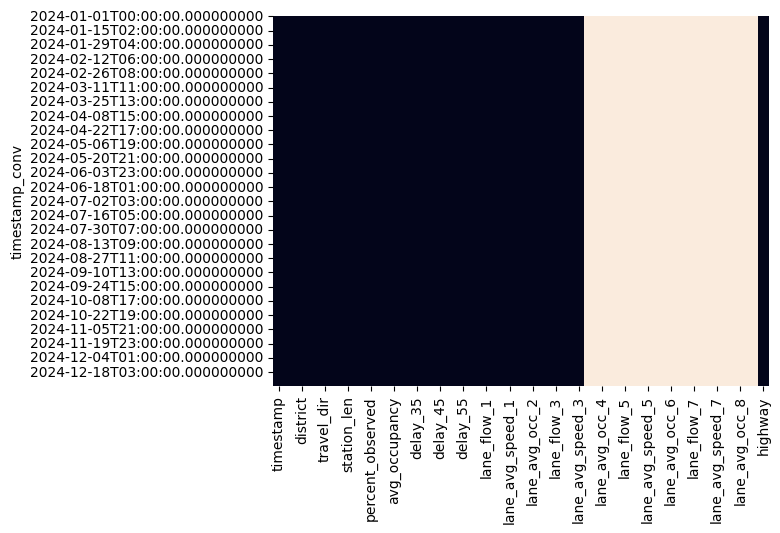

In [21]:
# pattern_tester = pandas_test_df.set_index('timestamp_conv')
df_sorted = pandas_test_df.sort_values(by='timestamp_conv')
pattern_tester = df_sorted.set_index('timestamp_conv')
pattern_tester.head()
sns.heatmap(pattern_tester.isnull(), cbar=False)

<Axes: xlabel='lane_type', ylabel='Count'>

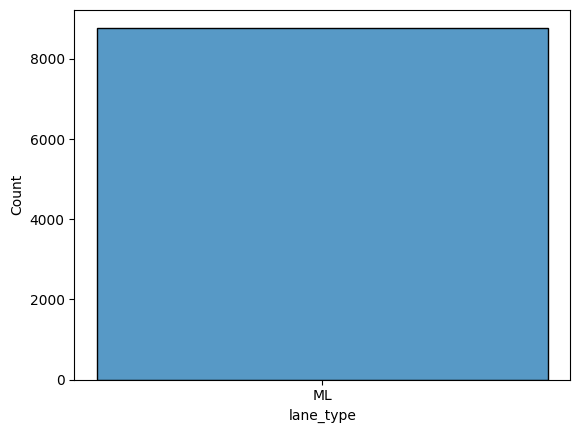

In [22]:
sns.histplot(data=pandas_test_df, x='lane_type') # OR = on-ramp

<Axes: xlabel='time'>

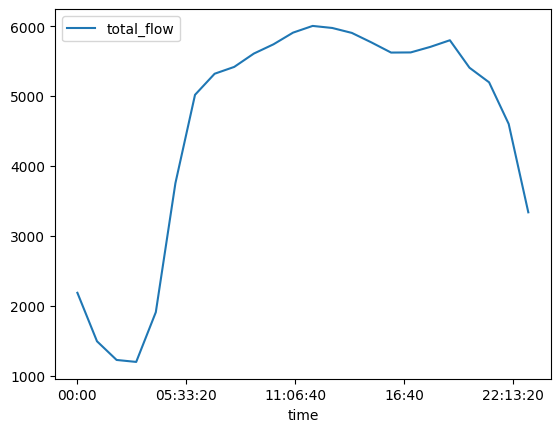

In [ ]:
# busiest times of the day
# vehicles per hour
pandas_test_df['time'] = pandas_test_df['timestamp_conv'].dt.time
group_by_hour = pd.DataFrame(pandas_test_df.groupby('time')['total_flow'].mean())
group_by_hour
group_by_hour.plot(y='total_flow')  # timestamp is now x-axis

<Axes: xlabel='time'>

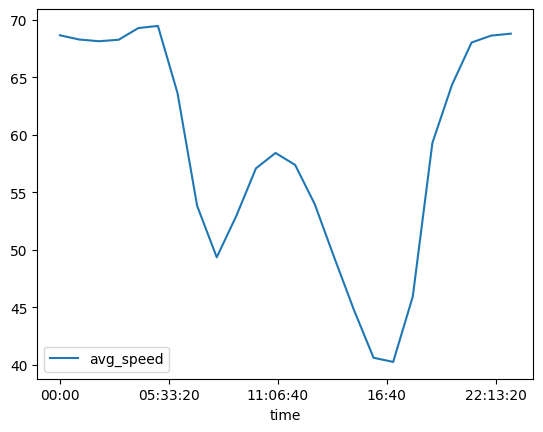

In [26]:
group_by_hour = pd.DataFrame(pandas_test_df.groupby('time')['avg_speed'].mean())
group_by_hour
group_by_hour.plot(y='avg_speed')  # timestamp is now x-axis

<Axes: xlabel='time'>

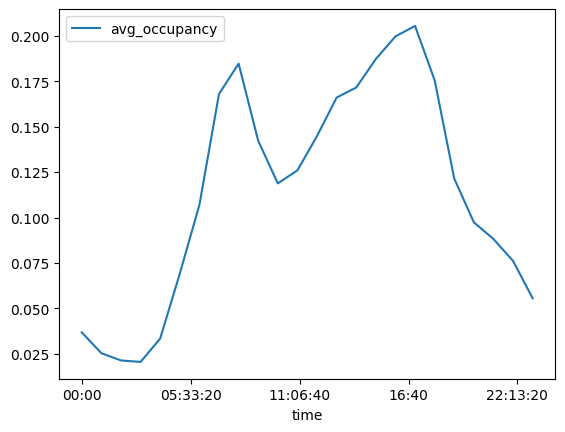

In [27]:
group_by_hour = pd.DataFrame(pandas_test_df.groupby('time')['avg_occupancy'].mean())
group_by_hour
group_by_hour.plot(y='avg_occupancy')  # timestamp is now x-axis

In [24]:
pandas_test_df['total_flow'].value_counts(dropna=False)

total_flow
6116.0    104
5758.0    104
2764.0     53
5898.0     53
4920.0     53
         ... 
5777.0     52
5855.0     52
5816.0     52
6209.0     52
1505.0     51
Name: count, Length: 166, dtype: int64

        total_flow
month             
1      4562.010753
2      4570.849138
3      4584.811575
4      4563.706944
5      4573.223118
6      4576.555556
7      4562.010753
8      4582.555108
9      4565.987500
10     4564.529570
11     4583.258333
12     4561.751344


<Axes: xlabel='month'>

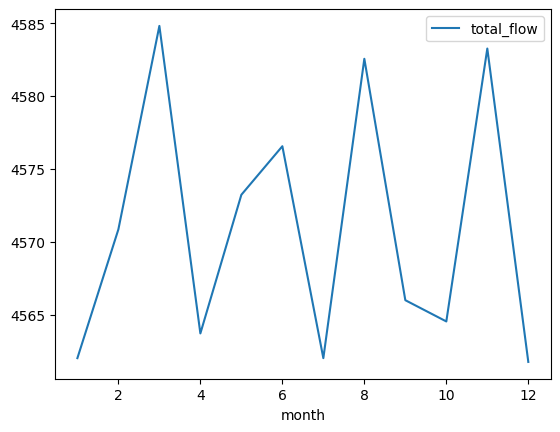

In [25]:
# busiest months - limited data because of NaN values in total_flow
pandas_test_df['month'] = pandas_test_df['timestamp_conv'].dt.month
group_by_month = pd.DataFrame(pandas_test_df.groupby('month')['total_flow'].mean())
print(group_by_month)
group_by_month.plot(y='total_flow')  # timestamp is now x-axis

                       ds     y
11    2024-05-01 00:00:00  68.6
4899  2024-05-01 01:00:00  68.1
9787  2024-05-01 02:00:00  67.9
14673 2024-05-01 03:00:00  68.1
19561 2024-05-01 04:00:00  69.8


14:21:24 - cmdstanpy - INFO - Chain [1] start processing
14:21:25 - cmdstanpy - INFO - Chain [1] done processing
/Users/lucy/Desktop/UCLA/Project418/notebooks/venv/lib/python3.9/site-packages/prophet/forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


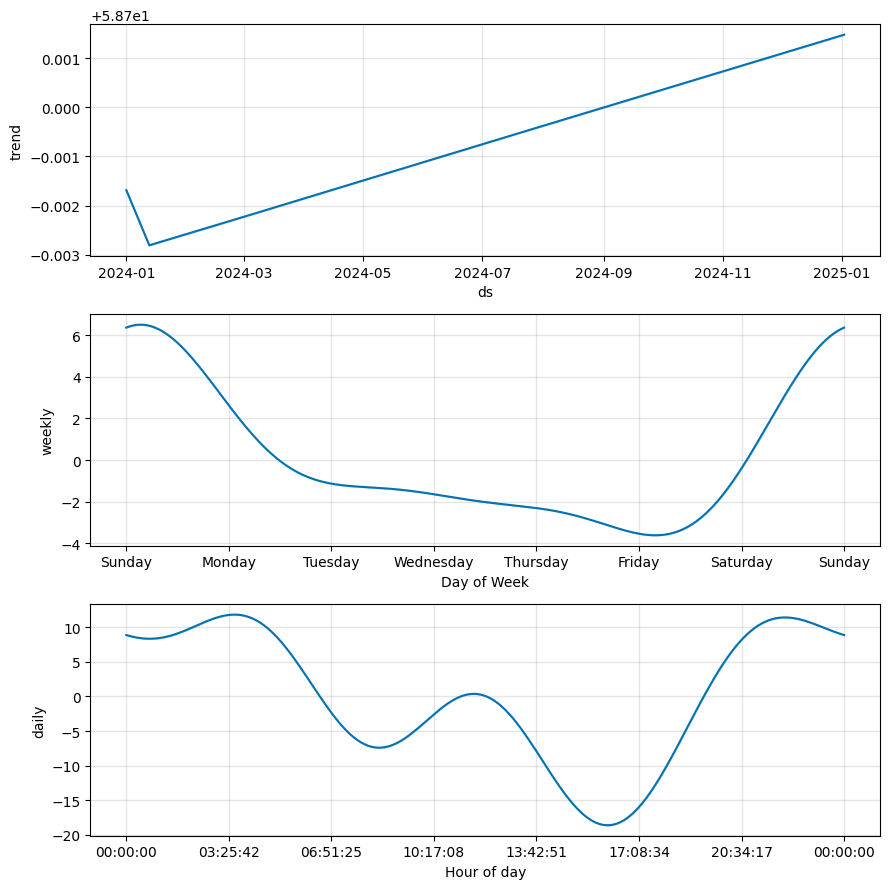

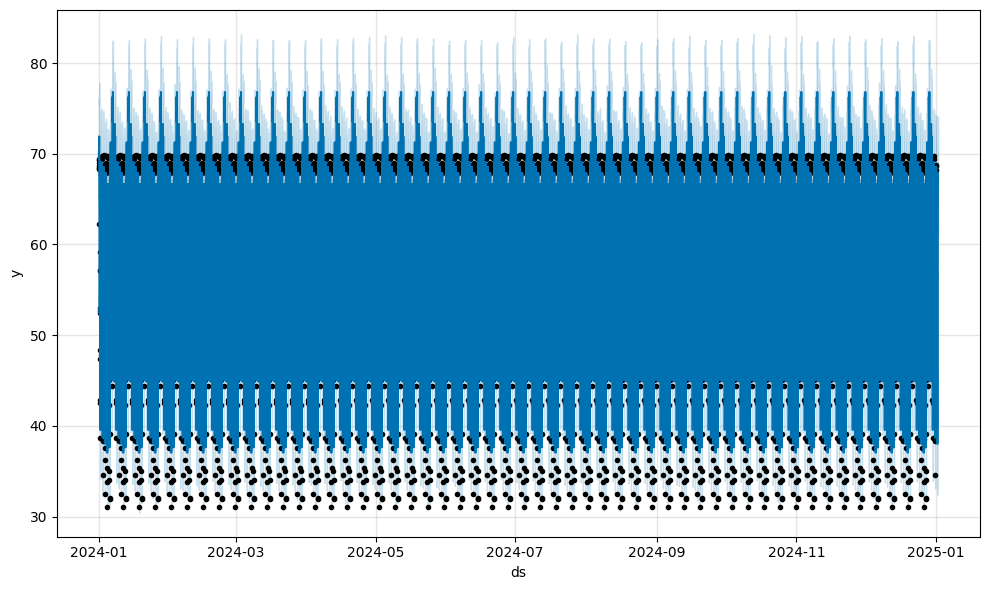

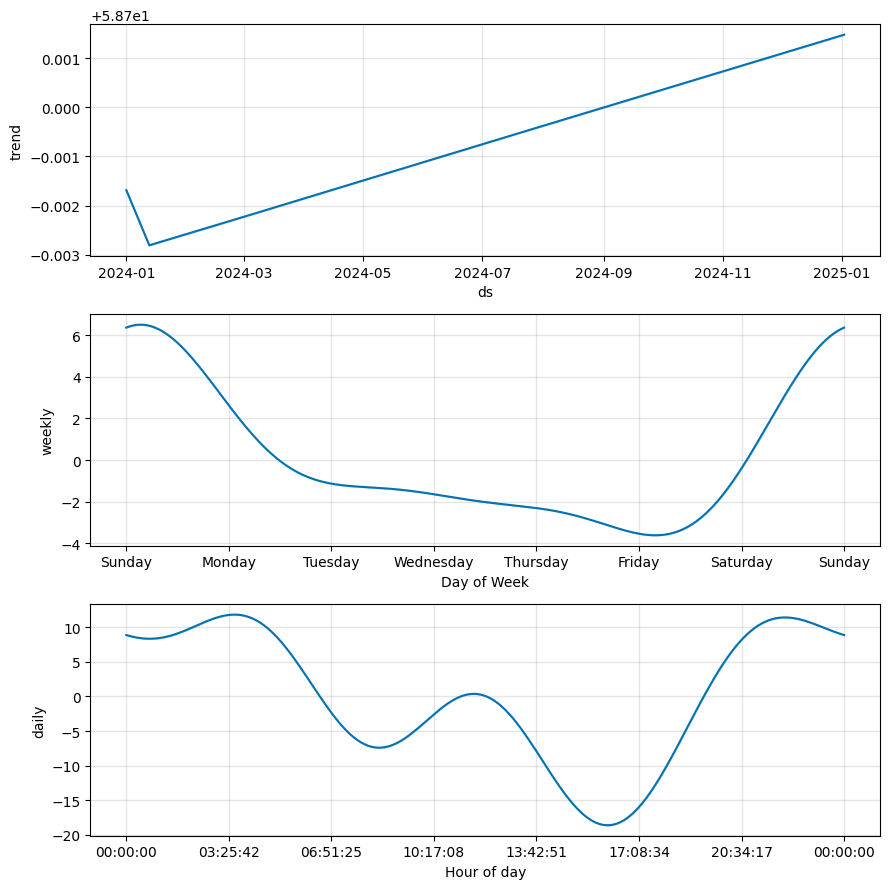

In [30]:
##### prophet model
# only models target variable
# good at missing data, seasonality, and outliers
# needs: regular timestamps, constant mean & variance, no large missing gaps, sufficient data -> ARIMA
from prophet import Prophet
df_prophet = pandas_test_df[['timestamp_conv', 'avg_speed']]
df_prophet.columns = ['ds', 'y']
print(df_prophet.head())
# create and fit model
model = Prophet()
model.fit(df_prophet)

# future predictions for 24 hours
future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

# visualize forecast
model.plot(forecast)
model.plot_components(forecast) # trend and seasonality components

       avg_speed
month           
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN


<Axes: xlabel='month'>

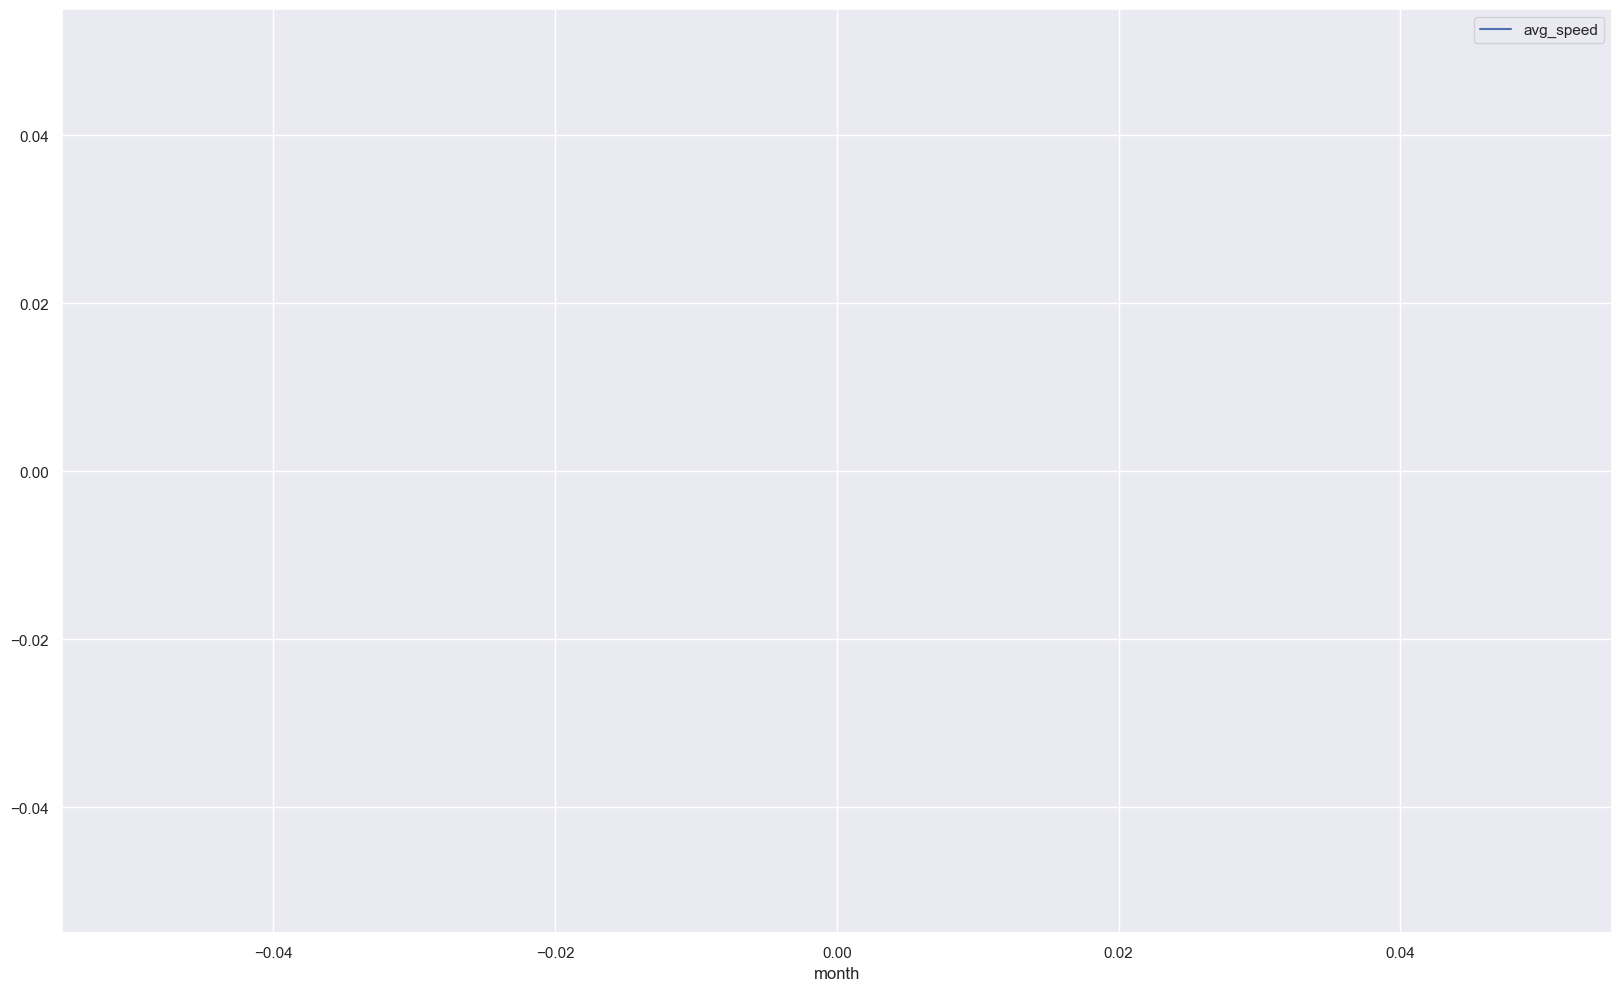

In [63]:
# busiest months - limited data because of NaN values in total_flow
pandas_test_df['month'] = pandas_test_df['timestamp_conv'].dt.month
group_by_month = pd.DataFrame(pandas_test_df.groupby('month')['avg_speed'].mean())
print(group_by_month)
group_by_month.plot(y='avg_speed')  # timestamp is now x-axis

In [36]:
df.isna().sum()

timestamp                  0
station_id                 0
district                   0
route_num                  0
travel_dir                 0
lane_type                  0
station_len         18435517
sample_num                 0
percent_observed           0
total_flow          13756449
avg_occupancy       13756449
avg_speed           18435517
delay_35            18435517
delay_40            18435517
delay_45            18435517
delay_50            18435517
delay_55            18435517
delay_60            18435517
lane_flow_1         13879727
lane_avg_occ_1      13879727
lane_avg_speed_1    18435517
lane_flow_2         25171480
lane_avg_occ_2      25171480
lane_avg_speed_2    25822020
lane_flow_3         26564984
lane_avg_occ_3      26564984
lane_avg_speed_3    26612490
lane_flow_4         29466953
lane_avg_occ_4      29466953
lane_avg_speed_4    29466953
lane_flow_5         38943810
lane_avg_occ_5      38943810
lane_avg_speed_5    38943810
lane_flow_6         42243072
lane_avg_occ_6

# New Section

In [ ]:
sns.set_theme(rc={'figure.figsize':(15,12)})

<Axes: xlabel='timestamp_conv', ylabel='avg_speed'>

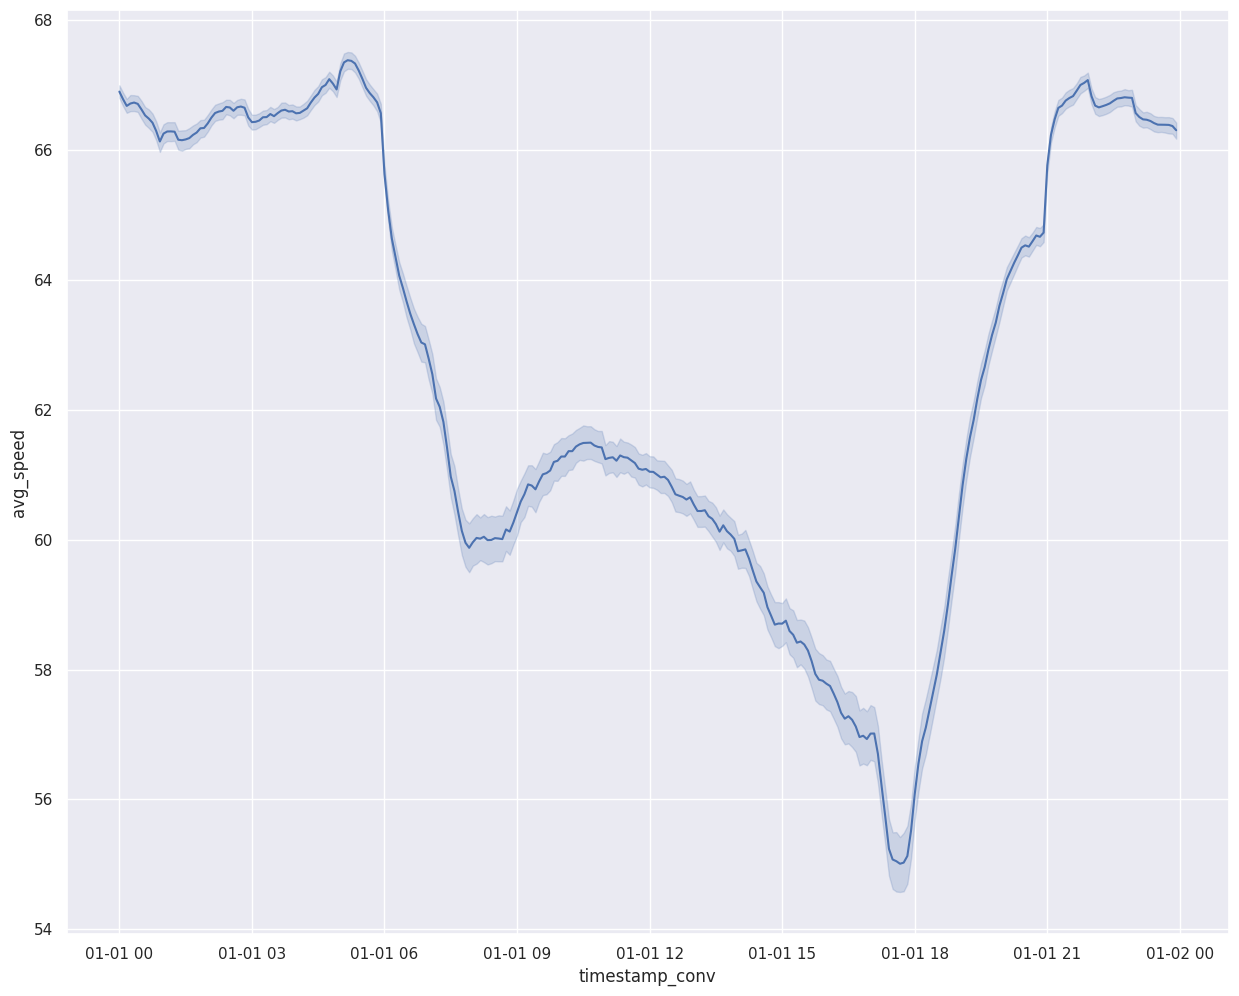

In [ ]:
# for given station id, plot time series data of avg speed over the period of one day, 1/1/2025
sns.lineplot(data=df, x="timestamp_conv", y="avg_speed")

<Axes: xlabel='timestamp_conv', ylabel='avg_occupancy'>

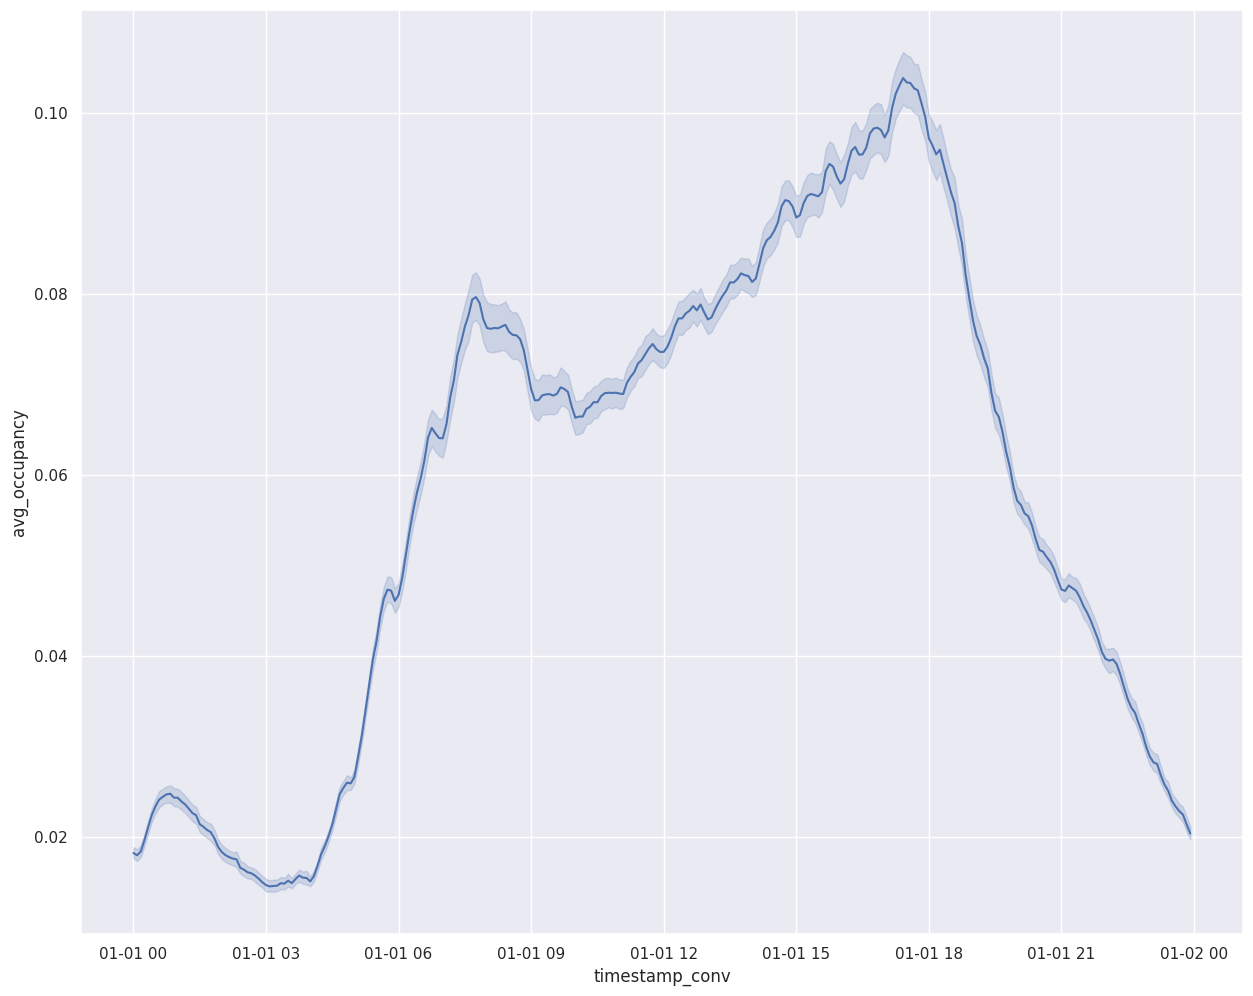

In [ ]:
sns.lineplot(data=df, x="timestamp_conv", y="avg_occupancy")

In [ ]:
# map for the station locations
# /content/d07_text_meta_2023_12_22.txt
locs_df = pd.read_csv('d07_text_meta_2023_12_22.txt', sep='\t')
locs_df

,ID,Fwy,Dir,District,County,City,State_PM,Abs_PM,Latitude,Longitude,Length,Type,Lanes,Name,User_ID_1,User_ID_2,User_ID_3,User_ID_4
0,715898,5,N,7,37,40032.0,.68,117.313,33.880069,-118.021261,0.828,ML,3,PHOEBE,2029,NaN,NaN,NaN
1,715900,5,S,7,37,40032.0,1.06,117.630,33.882892,-118.026822,NaN,OR,1,VALLEY VIEW,3255,NaN,NaN,NaN
2,715901,5,N,7,37,40032.0,1.11,117.743,33.883400,-118.027451,NaN,OR,1,VALLEY VIEW,3268,NaN,NaN,NaN
3,715903,5,N,7,37,69154.0,1.56,118.193,33.886992,-118.034125,NaN,OR,1,ALONDRA,3269,NaN,NaN,NaN
4,715904,5,S,7,37,69154.0,2.27,118.840,33.892489,-118.044573,NaN,OR,1,CARMENITA,3253,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,777794,5,S,7,37,8954.0,29.68,146.250,34.184491,-118.316733,2.645,HV,1,BURBANK 1,3243,NaN,NaN,NaN
4884,777795,5,N,7,37,8954.0,29.68,146.313,34.184656,-118.316541,2.645,HV,1,BURBANK 1,3243,NaN,NaN,NaN
4885,777796,5,N,7,37,8954.0,29.68,146.313,34.184656,-118.316541,0.350,ML,5,BURBANK 1,3243,NaN,NaN,NaN
4886,777797,5,S,7,37,8954.0,29.68,146.250,34.184491,-118.316733,NaN,FR,3,BURBANK 1,3243,NaN,NaN,NaN


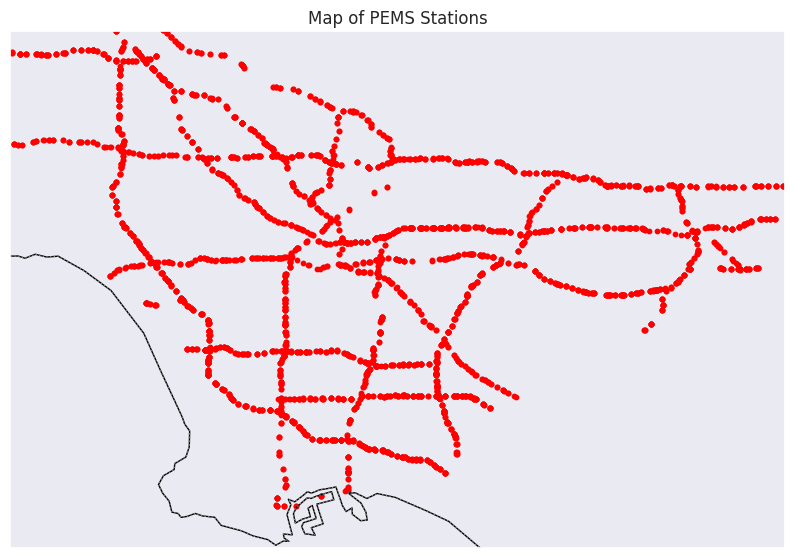

In [ ]:
# Create a figure with geographic projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')
ax.set_extent([-118.6, -117.7, 33.7, 34.3])  # [west, east, south, north], LA county


# Plot points
ax.scatter(locs_df['Longitude'], locs_df['Latitude'], color='red', s=10, transform=ccrs.PlateCarree())

plt.title("Map of PEMS Stations")
plt.show()

In [ ]:
### ARIMA model
# https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

In [ ]:
## XGBOOST to predict avg speed in the future

In [ ]:
df.groupby(['station_id'])

In [ ]:
df.columns = ['incident_id', 'cc_code', 'incident_num', 'timestamp', 'description', 'location', 'area', 'zoom_map',
              'tb_xy', 'lat', 'lon', 'district', 'county_fips_id', 'city_fips_id', 'freeway_num', 'freeway_dir', 'state_postmile',
              'abs_postmile', 'severity', 'duration']

In [ ]:
df.head()

,incident_id,cc_code,incident_num,timestamp,description,location,area,zoom_map,tb_xy,lat,lon,district,county_fips_id,city_fips_id,freeway_num,freeway_dir,state_postmile,abs_postmile,severity,duration
0,22839767,SAHB,250101,01/01/2025 00:00:00,1125-Traffic Hazard,US50 W I5 S CON / 5TH ST ONR,South Sac,NaN,NaN,38.567577,-121.512860,3.0,113.0,84816.0,50,W,L0.244,3.4,NaN,517.0
1,22839779,INHB,250101,01/01/2025 00:05:00,1125A-Animal Hazard,Sr91 W / Kraemer Blvd,Santa Ana,NaN,NaN,33.848002,-117.855553,12.0,59.0,2000.0,91,W,7.287,25.7,NaN,18.0
2,22839781,SAHB,250101,01/01/2025 00:11:00,FIRE-Report of Fire,I5 S / March Ln Ofr,Stockton,NaN,NaN,37.987341,-121.344724,10.0,77.0,NaN,5,S,30.208,475.7,NaN,1.0
3,22839788,LAHB,250101,01/01/2025 00:18:00,1125A-Animal Hazard,Sr58 E / Coffee Rd,Bakersfield,NaN,NaN,35.366776,-119.092152,6.0,29.0,NaN,58,E,49.144,106.3,NaN,3.0
4,22839792,GGHB,250101,01/01/2025 00:20:00,20002-Hit and Run No Injuries,Us101 N / Santa Monica Rd,Santa Barbara,NaN,NaN,34.403647,-119.528067,5.0,83.0,11446.0,101,N,3.777,86.7,NaN,184.0


In [ ]:
df_mod = df[df['lat'].notna()]

/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.11/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


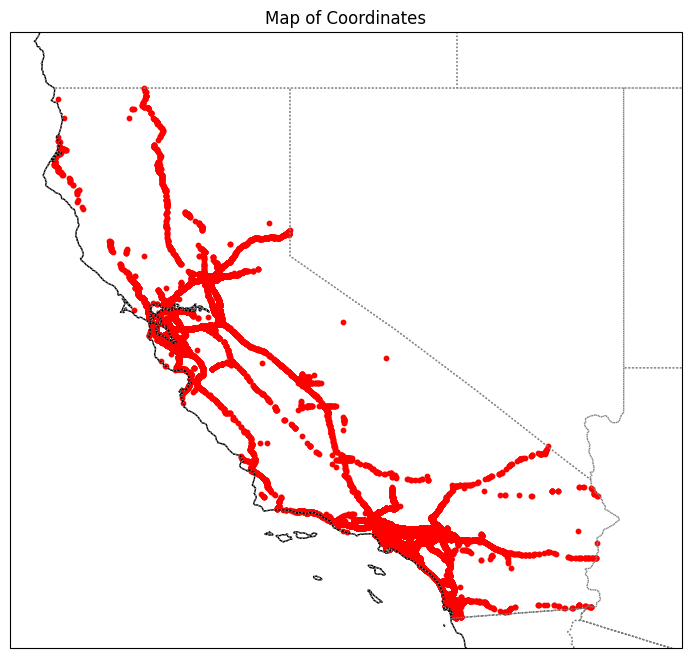

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature


# Create a figure with geographic projection
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='gray')
ax.set_extent([-125, -113, 32, 43])  # [west, east, south, north]


# Plot points
ax.scatter(df['lon'], df['lat'], color='red', s=10, transform=ccrs.PlateCarree())

plt.title("Map of Coordinates")
plt.show()


In [ ]:
import folium

# Center the map on the average coordinates
lat_center = df['lat'].mean()
lon_center = df['lon'].mean()

m = folium.Map(location=[lat_center, lon_center], zoom_start=6)

# Add markers
for _, row in df.iterrows():
  folium.Marker(
      location=[row['lat'], row['lon']]
      # popup=row['location']
  ).add_to(m)

# Save to HTML or display directly in Jupyter Notebook
m.save("map.html")
# m  # if using Jupyter


In [ ]:
top_ten = list(df['description'].value_counts().index[0:10])
top_ten

['1125-Traffic Hazard',
 '1183-Trfc Collision-Unkn Inj',
 '1182-Trfc Collision-No Inj',
 'FIRE-Report of Fire',
 '1179-Trfc Collision-1141 Enrt',
 '20002-Hit and Run No Injuries',
 '1125A-Animal Hazard',
 'CZP-Assist with Construction',
 'CFIRE-Car Fire',
 'ANIMAL-Live or Dead Animal']

In [ ]:
df['description_mod'] = ['Other' if x not in top_ten else x for x in df['description']]

In [ ]:
order = df['description_mod'].value_counts().sort_values(ascending=False)

In [ ]:
order.index

Index(['1125-Traffic Hazard', '1183-Trfc Collision-Unkn Inj',
       '1182-Trfc Collision-No Inj', 'FIRE-Report of Fire',
       '1179-Trfc Collision-1141 Enrt', 'Other',
       '20002-Hit and Run No Injuries', '1125A-Animal Hazard',
       'CZP-Assist with Construction', 'CFIRE-Car Fire',
       'ANIMAL-Live or Dead Animal'],
      dtype='object', name='description_mod')

<Axes: xlabel='count', ylabel='description_mod'>

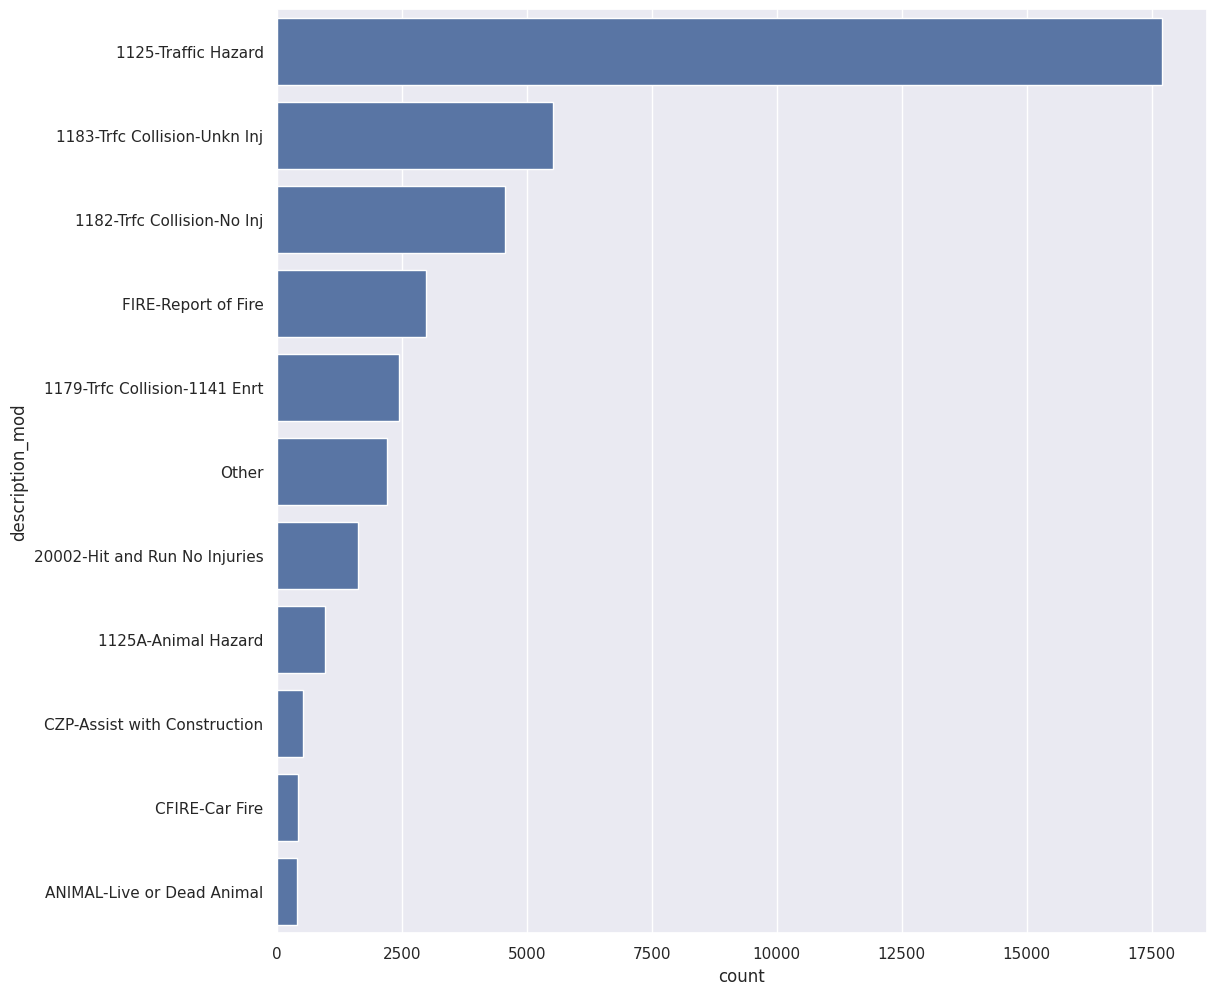

In [ ]:
sns.set_theme(rc={'figure.figsize':(12,12)})
sns.countplot(y='description_mod', data=df, order=list(order.index))

In [ ]:
censusDay = pd.read_csv('volumeDay.txt', header=None)
censusDay.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,01/01/2019 00:00:00,19280,1928001,101,N,NaN,23,1,660.821,ML,...,145,145,115,115,74,74,66,66,45,45
1,01/01/2019 00:00:00,19280,1928005,101,S,NaN,23,1,660.153,ML,...,78,78,61,61,34,34,20,20,18,18
2,01/01/2019 00:00:00,19300,1930001,101,N,NaN,15,1,791.454,ML,...,133,133,84,84,71,71,40,40,23,23
3,01/01/2019 00:00:00,19300,1930005,101,S,NaN,15,1,790.929,ML,...,135,135,97,97,78,78,33,33,27,27
4,01/01/2019 00:00:00,19870,1987001,101,N,23042.0,23,1,706.373,ML,...,572,572,424,424,317,317,229,229,163,163


In [ ]:
censusDay.columns = ['timestamp', 'census_station_id', 'census_sub_id', 'freeway_id', 'freeway_dir', 'fips_city_code', 'fips_county_code', 'district', 'abs_postmile', 'station_typ', ]

In [ ]:
Timestamp	The date and time of the beginning of the summary interval. For example, a date of 1/1/2012 indicates that the aggregate(s) contain measurements collected between 1/1/2012 00:00:00 and 1/1/2012 23:59:59. Note that hour, minute, and second values are always 0 for daily aggregations. The format is MM/DD/YYYY HH24:MI:SS.
Census Station Identifier	The unique number that identifies this census station within PeMS.
Census Substation Identifier	The unique number that identifies this census substation within PeMS.
Freeway Identifier	The unique number that identifies this freeway within PeMS. Typically, the value is the number commonly used to refer to the roadway. For example; for I-5, the value is 5
Freeway Direction	A string indicating the freeway direction.
FIPS City Code	The FIPS-assigned number for the city which contains this census station.
FIPS County Code	The FIPS assigned number for the county which contains this census station
District	The unique number that identifies the Caltrans district that contains this census station.
Absolute Postmile	The absolute postmile where this census station is located.
Station Type	A string indicating the type of station. Possible values (and their meaning are:
CD (Coll/Dist)
CH (Conventional Highway)
FF (Fwy-Fwy connector)
FR (Off Ramp)
HV (HOV)
ML (Mainline)
OR (On Ramp)

Census Station Set ID	The unique number that identifies the census station set within PeMS.
Lane	Lane number.
Observed Flow	Observed Flow
Estimated Flow	Estimated flow
Samples	The number of samples taken
Estimates	TBD
-----------	Below are the Observed Flow and Estimated Flow for each lane. Lowest lane number first	--------------
Observed Flow for Lane N/td>	observed flow for lane N/td>	vehicles/day
Estimated Flow for Lane N	estimated flow for lane N

In [ ]:
01/01/2019 00:00:00,19280,1928001,101,N,,23,1,660.821,ML,50389,
0,2316,2316,24,
0,25,25,18,18,10,10,8,8,14,14,9,9,3,3,24,24,30,30,63,63,97,97,131,131,165,165,155,155,210,210,251,251,257,257,240,240,161,161,145,145,115,115,74,74,66,66,45,45

In [ ]:
df = pd.read_csv('caltrans_hours.txt', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,01/01/2025 00:00:00,715898,7,5,N,ML,0.828,0,0,2183.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/01/2025 00:00:00,715900,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/01/2025 00:00:00,715901,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/01/2025 00:00:00,715903,7,5,N,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/01/2025 00:00:00,715904,7,5,S,OR,NaN,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(47001, 42)

In [ ]:
01/01/2025 00:00:00,
715915,
7,
5,
N,
ML,
.62,0,0,1806,.032,68.6,0,0,0,0,0,0,478,.0227,72.3,780,.0403,70.1,548,.0329,63.1,,,,,,,,,,,,,,,


In [ ]:
df.columns = ['timestamp', 'station_name', 'district_num', 'route_num', 'travel_dir', 'lane_typ', 'station_len', 'num_samples', 'percent_observed', 'total_flow', 'avg_occ', 'avg_speed', 'delay_35', 'delay_40', 'delay_45', 'delay_50', 'delay_55', 'delay_60', 'lane_n_flow', 'lane_n_avg_occ', 'lane_n_avg_speed']

ValueError: Length mismatch: Expected axis has 42 elements, new values have 21 elements